## Cross Validation

- Cross-validation is dividing training data into a few parts. We train the model on
some of these parts and test on the remaining parts
- Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets.
- Some most popular and widely used cross-validation techniques are as follows:
    1. k-fold
    2. stratified k-fold
    3. hold-out based 
    4. leave-one-out 
    5. group k-fold 

### 1. k-fold

- When you get a dataset to build machine learning models, you separate them into two different sets: training and validation.
- We can divide the data into k different sets which are exclusive of each other. This
is known as k-fold cross-validation.
- You can use this process with almost all kinds of datasets. 

In [1]:
# import pandas and model_selection module of scikit-learn

import pandas as pd
from sklearn import model_selection    

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.shape

(77, 16)

In [7]:
# We create a new folder kfold and fill it with -1
df["kfold"] = -1

In [8]:
# randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

In [10]:
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [13]:
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,kfold
39,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492,2
57,Grape Nuts Flakes,P,C,100,3,1,140,3.0,15.0,5,85,25,3,1.00,0.88,52.076897,3
46,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.00,0.67,49.787445,2
51,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863,3
76,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993,4


In [14]:
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)

### 2. Stratified k-fold

- If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, prefer using stratified k-fold cross validation.
- Stratified k-fold cross-validation keeps the ratio of labels in each fold constant.
- We assume that our CSV dataset has a column called “target” and it is a classification problem!
- If it’s a standard classification problem, choose stratified k-fold blindly.

In [23]:
df1 = pd.read_csv("winequality-red.csv")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df1.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'count')

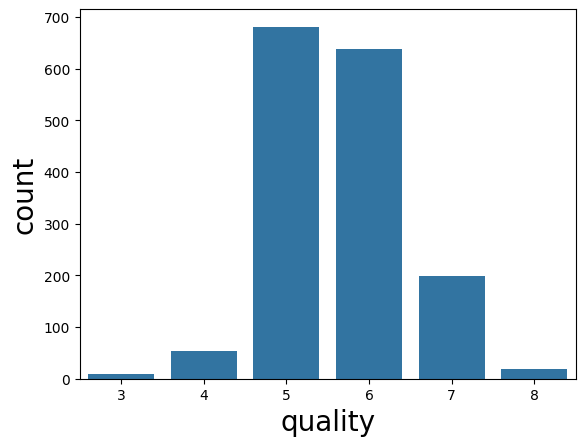

In [29]:
import seaborn as sns

b = sns.countplot(x='quality', data=df1)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [28]:
import pandas as pd
from sklearn import model_selection

df1 = pd.read_csv("winequality-red.csv")

df1["kfold"] = -1

df1 = df1.sample(frac=1).reset_index(drop=True)

# fetch targets
y = df1.quality.values

kf = model_selection.StratifiedKFold(n_splits=5)

for f, (t_, v_) in enumerate(kf.split(X=df1, y=y)):
    df1.loc[v_, 'kfold'] = f

df1.to_csv("train_folds1.csv", index=False)

### 3. Hold-out based validation

- If we have a large amount of data, we should use hold-out method
- It is frequently used with time-series data

### 4. Leave-one-out

- For small datasets, using a large validation set reduces the training data too much.
- A solution is Leave-One-Out Cross-Validation (LOOCV), where:
    1. 𝑘 = 𝑁 i.e., the number of folds equals the number of samples.
    2. Each fold trains on all samples except one, which is used for validation.
- This ensures maximum use of data for training in every fold.
- Drawback: can be computationally expensive if the model is slow.
- But since it’s applied mainly to small datasets, the time cost is usually acceptable.

#### Regression
* For **regression problems**, most cross-validation techniques (e.g., k-fold, LOOCV) can be used.
* **Stratified k-fold** is not directly applicable to regression.
* To use stratified k-fold in regression:

  * **Bin the target values** into discrete intervals.
  * Apply stratified k-fold as in classification.
* Choosing number of bins:

  * For **large datasets** (>10k or >100k samples): use \~10–20 bins (exact choice doesn’t matter much).
  * For **smaller datasets**, use **Sturge’s Rule**:

    $$
    \text{Number of Bins} = 1 + \log_2(N)
    $$

    where $N$ = number of samples.


In [30]:
# stratified k-fold for regression

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column kfold and fill it with -1
    data["kfold"] = -1

    # randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)

    # calculate the number of bins by Sturge's law
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )

    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    # fill the new kfold column
    # note that instead of target values, we are using bins
    for f, (t_, v_) in enumerate(kf.split(X=data, y = data.bins.values)):
        data.loc[v_, "kfold"] = f

    # drop the bins column
    data = data.drop("bins", axis = 1)

    # return the dataframe with folds
    return data

In [31]:
# We create a sample dataset with 15k rows, 100 features and 1 target
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

# Create a dataframe out of our numpy arrays
df = pd.DataFrame(
    X,
    columns = [f"f_{i}" for i in range(X.shape[1])]
)

df.loc[:, "target"] = y

# create folds
df = create_folds(df)

In [34]:
df.sample(5)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
4860,-1.100333,1.596506,-0.447240,-0.155339,0.768688,-1.140359,-1.315275,0.729229,-0.481205,0.099111,-1.157138,1.522265,0.118098,-1.694440,-0.778429,0.048688,-0.638231,-1.537185,2.064234,-0.638144,-0.401401,0.373256,1.371591,0.645987,-2.550386,-0.616242,0.213977,-2.115246,1.206391,0.030738,-0.624705,-1.090417,0.674502,-1.210571,1.638903,0.153462,0.051586,0.886169,-1.634777,0.525817,...,1.352119,-0.636709,0.442178,0.111852,-0.365221,2.329040,0.046826,1.720009,0.778567,0.360709,0.524029,-1.595084,-0.067112,-0.317940,0.798776,3.403532,-0.835296,0.427874,0.363404,-1.217224,0.640413,-0.484853,-0.837461,1.118377,-0.940739,-1.342685,-0.293663,1.895739,1.091888,0.248871,0.525043,-0.468064,0.139095,0.525301,1.560743,1.191666,-1.460764,-0.879890,250.967893,1
1289,-0.458971,-0.514250,-0.384236,1.303537,0.408554,-0.303840,0.689435,-1.521482,1.486747,-0.027605,0.029527,0.636027,0.304340,0.348113,0.706906,0.723225,-1.849421,0.684133,-0.200627,-0.052160,-1.383014,0.672471,-0.069973,-0.387445,-0.690331,0.769790,-1.045584,1.674893,-0.138707,0.559123,-1.333578,-0.675797,0.442530,1.341092,0.026213,-1.432721,-0.037735,-0.742625,1.840400,-1.698349,...,3.131351,1.770645,0.683084,0.342366,-0.882764,0.703431,1.608211,2.003011,-0.312170,-0.377720,0.839849,-0.625976,1.124728,-0.169126,0.586660,-0.318102,-1.188295,0.885947,-0.781772,0.825251,0.419159,-0.598293,2.037924,0.731487,-0.716807,0.510548,-2.491185,-0.867057,-0.301303,1.010110,-0.453490,-0.068894,0.751855,0.358542,-1.722401,-1.092141,0.766122,0.683955,-201.704817,0
14572,1.881563,1.641880,0.068960,0.802686,0.635688,0.995774,0.128104,1.443934,1.389210,0.261312,1.523943,1.578040,2.121570,0.106060,0.889536,-0.092860,0.292817,-0.350937,-0.352299,-1.184277,-0.234141,1.415409,-0.017750,-1.458919,-2.069726,-1.459200,-1.069537,0.712625,1.599857,-0.278087,-0.040440,0.279881,-0.405954,-0.464185,-0.159533,1.791862,-0.230057,0.259606,-2.373634,1.481068,...,-0.664664,-0.302547,-0.961745,1.172020,-1.035984,1.671667,-1.250874,-0.542648,-1.639854,0.303510,0.405758,0.759954,-0.108705,-0.083798,0.818000,0.720012,0.163716,0.250183,-1.801485,0.068865,0.304377,-0.245528,1.108795,1.634221,0.925363,-1.167001,-3.189395,0.634477,0.205002,0.240518,-0.465929,0.999992,-0.102788,-0.808238,-0.292347,-0.892096,0.583068,-1.342252,101.945957,4
3183,0.544669,0.582327,0.515926,-0.985165,1.745819,-0.340498,0.640689,-1.438467,0.131939,0.092889,2.656795,0.075372,0.898241,-0.401449,-0.607598,0.315249,0.018966,-1.461689,1.212348,0.529926,-0.225195,-0.580717,-1.464553,-0.892287,2.353919,-0.109732,-0.301396,0.017284,0.342370,1.620593,0.593056,-1.148802,-0.541117,0.765927,-1.216618,-2.072983,0.724252,-1.884006,-0.429297,-0.072224,...,2.450153,-0.686152,-1.144495,-0.532931,1.725963,0.443773,0.984007,-0.792249,-0.013079,0.827847,-0.728175,-0.202733,-0.187812,1.574468,0.278324,0.339749,-0.852040,1.438875,0.397536,-1.473282,-0.649861,1.492846,-0.842736,0.205499,-0.657495,-1.237852,0.348460,0.578019,0.835565,0.985858,-0.422448,-0.084698,0.640405,1.394657,1.805651,0.602318,-1.214704,0.765632,292.768364,1
12872,-1.025454,0.052576,-0.232552,0.292508,0.436781,-1.688212,0.251557,-0.374332,-1.247372,0.604061,2.877468,0.307691,-0.282995,0.442286,-0.723925,-0.153143,0.041811,1.203674,-0.186925,2.266892,0.573856,-0.735313,1.449141,0.645452,0.593594,0.503474,-1.322764,0.087908,0.235184,0.297575,0.859857,1.063354,-1.676181,1.313912,-0.108696,0.649976,-0.014337,-0.177792,0.602186,1.179113,...,-0.663608,1.295036,-1.643778,1.045890,-0.530189,-1.094867,0.679302,0.049364,0.606455,-1.111221,-0.976514,0.480518,-1.597730,1.401430,-0.541795,0.737370,0.155108,-0.464668,0.8

* **Cross-validation** is the first and most essential step in building ML models.
* Always **split your data first** before:

  * Doing feature engineering
  * Training models
* A **good cross-validation scheme** ensures validation data is representative of both training and real-world data.
* Proper cross-validation leads to models that are **highly generalizable**.


### 5. group k-fold

* Suppose we are building a **binary classifier** to detect skin cancer (benign vs malignant) from patient images.
* Problem: the dataset may have **multiple images per patient**.
* If we split data randomly, the **same patient could appear in both training and validation sets**, causing **data leakage**.
* **GroupKFold** solves this by:

  * Treating each **patient as a group**.
  * Ensuring that **all images from one patient stay in the same fold**.
  * This means a patient’s images are either entirely in training or entirely in validation, never both.
* This makes the cross-validation more **realistic and reliable**, since the model is tested on unseen patients.